In [1]:
#install ktrain library
!pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 46.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.0/266.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [2]:
#import necessary libraries
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis

In [3]:
#import regular expression (for our dataset label/anotation)
import re

In [4]:
#passing our dataset image label pattern to regular expression
pattern=r'([^/]+)_\d+_\d+_\d+ .jpg$'
p=re.compile(pattern)
r=p.search('11_0_0_20170117190914091 .jpg')
print (r.group(1))

11


In [5]:
#import google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#Dataset directory address
DATADIR= '/content/gdrive/MyDrive/Images'

In [8]:
#passing the defined variables for the dataset through ktrain
(train_data, test_data, preproc) = vis.images_from_fname(DATADIR, pattern=pattern,
                                                         is_regression = True, target_size=(200, 200),
                                                         color_mode='rgb', random_state = 42)

/usr/local/lib/python3.8/dist-packages/ktrain/vision/data.py:819: UserWarning: Could not extract target for /content/gdrive/MyDrive/Images/35_0_0_20170120221032076  (1).jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/ktrain/vision/data.py:819: UserWarning: Could not extract target for /content/gdrive/MyDrive/Images/50_0_0_20170120134018751  (1).jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/ktrain/vision/data.py:819: UserWarning: Could not extract target for /content/gdrive/MyDrive/Images/66_0_0_20170120225927930 (1).jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/ktrain/vision/data.py:819: UserWarning: Could not extract target for /content/gdrive/MyDrive/Images/66_0_0_20170120225917395 (1).jpg -  skipping this file
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/ktrain/vision/data.py:819: UserWarning: Could not extract target for /content/gdrive/MyDrive/Images/66_0_0_20170120

['label']
       label
10325   26.0
776     70.0
10087   26.0
3045    44.0
21954    2.0
['label']
       label
17813    6.0
15079   64.0
22828    1.0
16073   18.0
8972    35.0
Found 21333 validated image filenames.
Found 2371 validated image filenames.


In [9]:
#printing available pretrained classifiers for the regression task
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [10]:
#making use of RESNET50 model
model = vis.image_regression_model('pretrained_resnet50', train_data=train_data,
                                   val_data =test_data, metrics=['mae'],
                                   optimizer_name= 'adam')

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94765736/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [11]:
#wrapping the model with a learner for training
learner=ktrain.get_learner(model=model, train_data=train_data,
                           val_data=test_data, batch_size=64)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
333/333 [==============================] - 381s 1s/step - loss: 860.2501 - mae: 22.6054
Epoch 2/2
333/333 [==============================] - 29s 87ms/step - loss: 4676.8066 - mae: 30.8038


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


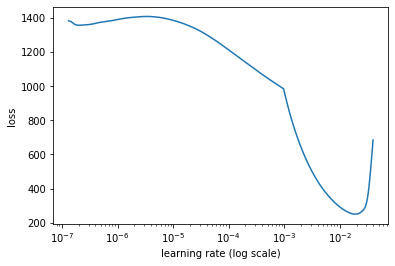

In [12]:
#Estimate learning rate
learner.lr_find(max_epochs=2)
learner.lr_plot()



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
334/334 [==============================] - 83s 238ms/step - loss: 416.7731 - mae: 15.0252 - val_loss: 201.7007 - val_mae: 10.7009
Epoch 2/5
334/334 [==============================] - 77s 231ms/step - loss: 163.5054 - mae: 9.7463 - val_loss: 133.8278 - val_mae: 8.7123
Epoch 3/5
334/334 [==============================] - 79s 235ms/step - loss: 121.8385 - mae: 8.4356 - val_loss: 111.8073 - val_mae: 7.9465
Epoch 4/5
334/334 [==============================] - 77s 231ms/step - loss: 105.9703 - mae: 7.8643 - val_loss: 104.6298 - val_mae: 7.6915
Epoch 5/5
334/334 [==============================] - 77s 230ms/step - loss: 98.8972 - mae: 7.5828 - val_loss: 102.7302 - val_mae: 7.5810


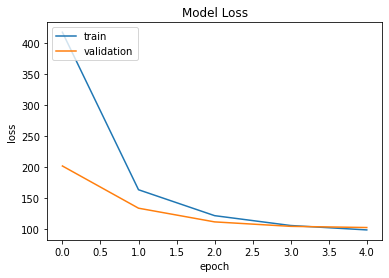

In [13]:
#from  the plot, we pick a learning rate of 1e-04
#passing the learning rate and number of epochs for training)
learner.fit_onecycle(1e-4, 5)
#plot loss
learner.plot('loss')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
334/334 [==============================] - 203s 585ms/step - loss: 98.4925 - mae: 7.4811 - val_loss: 115.6429 - val_mae: 7.7398
Epoch 2/5
334/334 [==============================] - 194s 580ms/step - loss: 45.0706 - mae: 5.1111 - val_loss: 79.9440 - val_mae: 6.3746
Epoch 3/5
334/334 [==============================] - 194s 579ms/step - loss: 34.9323 - mae: 4.5030 - val_loss: 69.7468 - val_mae: 5.9860
Epoch 4/5
334/334 [==============================] - 194s 579ms/step - loss: 22.6841 - mae: 3.6066 - val_loss: 59.8500 - val_mae: 5.5773
Epoch 5/5
334/334 [==============================] - 194s 580ms/step - loss: 12.0172 - mae: 2.6198 - val_loss: 56.2243 - val_mae: 5.3396


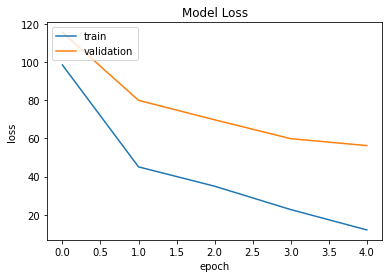

In [14]:
#freezing 15 layers
learner.freeze(15)
learner.fit_onecycle(1e-4, 5)
learner.plot('loss')



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
334/334 [==============================] - 199s 582ms/step - loss: 9.3376 - mae: 2.3360 - val_loss: 57.1432 - val_mae: 5.4479
Epoch 2/5
334/334 [==============================] - 194s 580ms/step - loss: 10.2564 - mae: 2.4244 - val_loss: 61.8001 - val_mae: 5.5633
Epoch 3/5
334/334 [==============================] - 194s 580ms/step - loss: 17.0735 - mae: 3.1031 - val_loss: 67.3478 - val_mae: 5.8086
Epoch 4/5
334/334 [==============================] - 194s 580ms/step - loss: 17.3165 - mae: 3.0885 - val_loss: 55.7009 - val_mae: 5.2872
Epoch 5/5
334/334 [==============================] - 194s 579ms/step - loss: 9.2424 - mae: 2.2606 - val_loss: 53.9133 - val_mae: 5.2110


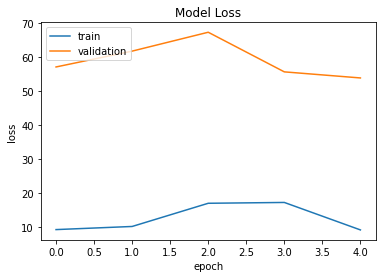

In [15]:
#freezing 15 layers
learner.freeze(15)
learner.fit_onecycle(1e-4, 5)
learner.plot('loss')

In [16]:
learner.evaluate()

75/75 [==============================] - 10s 117ms/step


[('mae', 5.2110085)]

In [17]:
#to view validation examples with highest loss
learner.view_top_losses

<bound method ImageClassLearner.view_top_losses of <ktrain.vision.learner.ImageClassLearner object at 0x7fb6101d8550>>

In [18]:
#show our model structure
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [19]:
#Creating our predictor
predictor= ktrain.get_predictor(learner.model, preproc)

In [20]:
#To get few (10-20) validation images from the test dataset
test_data.filenames[10:20]

['48_0_1_20170116233413749 .jpg',
 '26_0_4_20170117153243021 .jpg',
 '21_1_0_20170112233610183 .jpg',
 '36_0_0_20170113184113374 .jpg',
 '82_0_0_20170111223913094 .jpg',
 '76_0_1_20170116204915499 .jpg',
 '25_1_1_20170112191300605 .jpg',
 '40_0_2_20170117000400201 .jpg',
 '85_1_4_20170110184012572 .jpg',
 '23_1_4_20170103233619053 .jpg']

In [29]:
#To show prediction
def show_prediction(fname):
    fname=DATADIR + '/' + fname
    pred = round(predictor.predict_filename(fname)[0])
    actual = int(p.search(fname).group(1))
    vis.show_image(fname)
    print('Estimated age: %s | Actual Age: %s' % (pred, actual))

1/1 [==============================] - 0s 32ms/step
Estimated age: 56 | Actual Age: 54


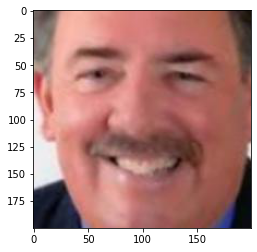

In [30]:
show_prediction('54_0_0_20170113184055047 .jpg')

In [23]:
import pickle 
pickle.dump(predictor, open("age_predictor.pkl", "wb"))

In [34]:
model = pickle.load(open("age_predictor.pkl", "rb"))


In [27]:
#To show ubaid prediction
def show_prediction_ubaid(fname):
    fname=DATADIR + '/' + fname
    pred = round(model.predict_filename(fname)[0])
    actual = int(p.search(fname).group(1))
    vis.show_image(fname)
    print('Estimated age: %s | Actual Age: %s' % (pred, actual))

1/1 [==============================] - 0s 46ms/step
Estimated age: 56 | Actual Age: 54


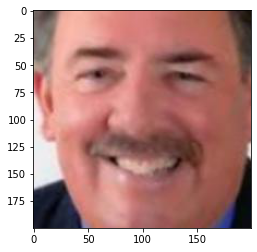

In [28]:
show_prediction_ubaid('54_0_0_20170113184055047 .jpg')

1/1 [==============================] - 0s 80ms/step
Estimated age: 51 | Actual Age: 65


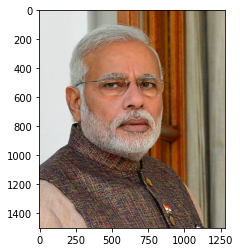

In [32]:
#doing a custom prediction 
pred = round(model.predict_filename("modi.jpg")[0])
actual = 65
vis.show_image("modi.jpg")
print('Estimated age: %s | Actual Age: %s' % (pred, actual))

In [33]:
pred = round(model.predict_filename("modi.jpg")[0])
pred

1/1 [==============================] - 0s 55ms/step


51

In [35]:
predictor.save('model_2')

In [ ]:
ktrain.get_predictor(learner.model,preproc=trans).save('model')

In [ ]:
#for real time estimation

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


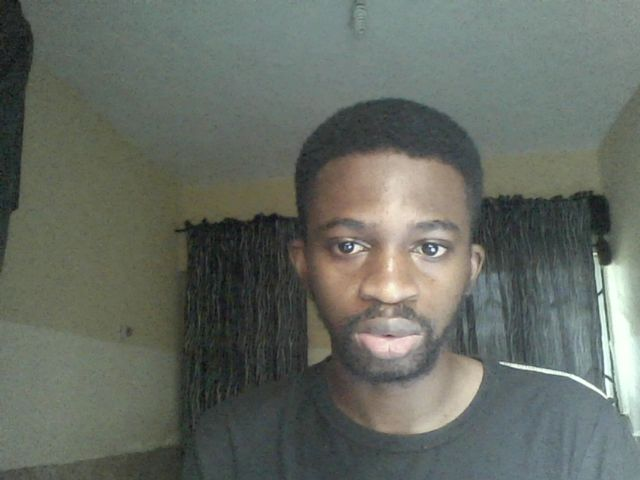

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Your estimated age is: 31


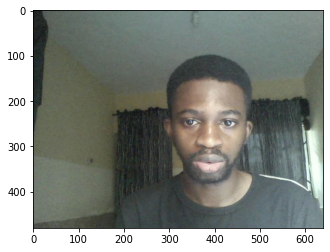

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('Your estimated age is: %s' % pred)
real_time_prediction('photo.jpg')

Your estimated age is: 52


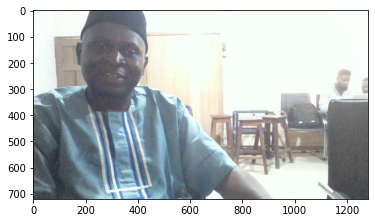

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('Your estimated age is: %s' % pred)
real_time_prediction('/content/WIN_20210701_11_04_54_Pro.jpg')

In [ ]:
#saving our predictor for future use
predictor.save('/content/Amen_age_predictor')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!zip -r /content/Amen.zip /content/Amen_age_predictor

  adding: content/Amen_age_predictor/ (stored 0%)
  adding: content/Amen_age_predictor/tf_model.h5 (deflated 9%)
  adding: content/Amen_age_predictor/tf_model.preproc (deflated 41%)


In [ ]:
#redeploy

In [ ]:
predictor = ktrain.load_predictor('/content/gdrive/MyDrive/Afacial_age_prediction/content/Afacial_age_prediction')

NameError: ignored

In [ ]:
predictor.predict_filename(DATADIR+'/22_0_2_20170104021348142 .jpg')

array([23.71928], dtype=float32)

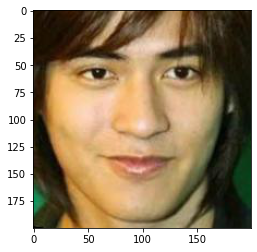

In [ ]:
vis.show_image(DATADIR+'/22_0_2_20170104021348142 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/45_1_3_20170119193000096 .jpg')

array([45.327957], dtype=float32)

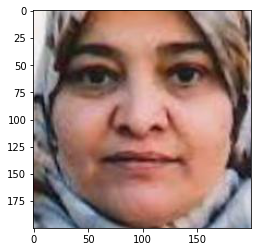

In [ ]:
vis.show_image(DATADIR+'/45_1_3_20170119193000096 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/1_0_0_20170109192219011 .jpg')

array([2.2915583], dtype=float32)

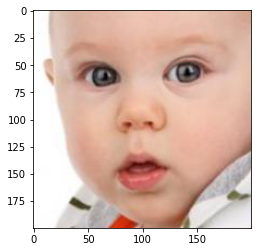

In [ ]:
vis.show_image(DATADIR+'/1_0_0_20170109192219011 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/35_1_0_20170103182348593 .jpg')

array([37.788612], dtype=float32)

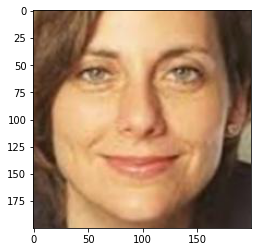

In [ ]:
vis.show_image(DATADIR+'/35_1_0_20170103182348593 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/88_1_0_20170110183704246 .jpg')

array([88.415375], dtype=float32)

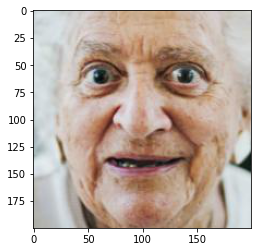

In [ ]:
vis.show_image(DATADIR+'/88_1_0_20170110183704246 .jpg')

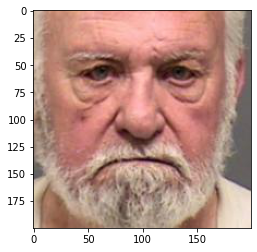

In [ ]:
vis.show_image(DATADIR+'/75_0_0_20170111210708463 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/56_0_1_20170120223802390 .jpg')

array([49.583588], dtype=float32)

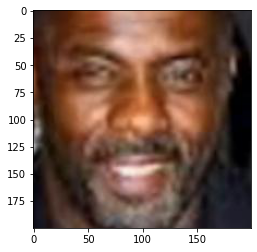

In [ ]:
vis.show_image(DATADIR+'/56_0_1_20170120223802390 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/30_1_1_20170114031528104 .jpg')

array([25.762346], dtype=float32)

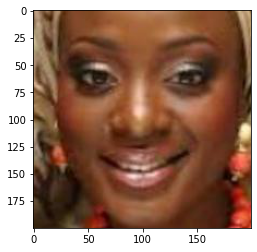

In [ ]:
vis.show_image(DATADIR+'/30_1_1_20170114031528104 .jpg')

In [ ]:
predictor.predict_filename(DATADIR+'/12_1_0_20170109205043077 .jpg')

array([15.55728], dtype=float32)

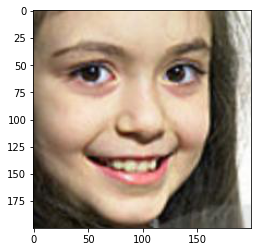

In [ ]:
vis.show_image(DATADIR+'/12_1_0_20170109205043077 .jpg')

In [ ]:
#REAL TIME ESTIMATION

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

In [ ]:
real_time_prediction('/content/WIN_20210701_11_04_54_Pro.jpg')

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

predicted age: 58


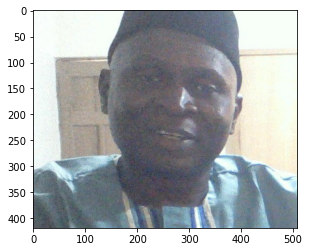

In [ ]:
real_time_prediction('/content/WIN_20210701_11_04_54_Pro - Copy.jpg')

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

predicted age: 31


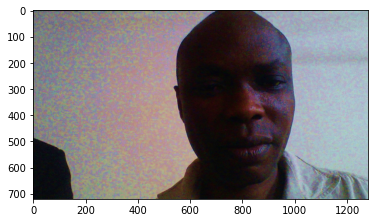

In [ ]:
real_time_prediction('')

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

In [ ]:
real_time_prediction('')

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

predicted age: 50


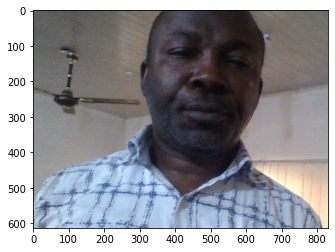

In [ ]:
real_time_prediction('/content/WIN_20210701_12_52_18_Pro - Copy.jpg')

predicted age: 25


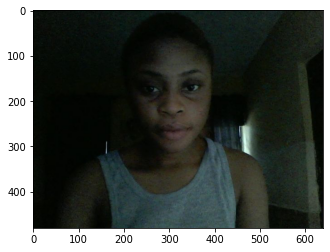

In [ ]:
real_time_prediction('//content/photo.jpg')

predicted age: 20


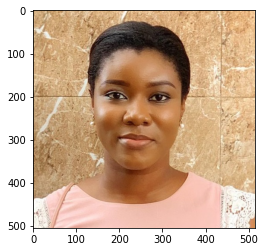

In [ ]:
real_time_prediction('/content/26.jpg')

predicted age: 32


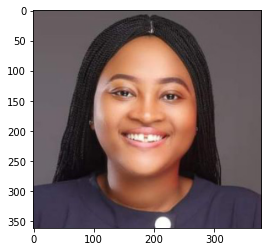

In [ ]:
real_time_prediction('//content/26_.jpg')

predicted age: 31


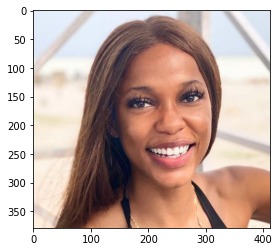

In [ ]:
real_time_prediction('/content/30.jpg')

predicted age: 77


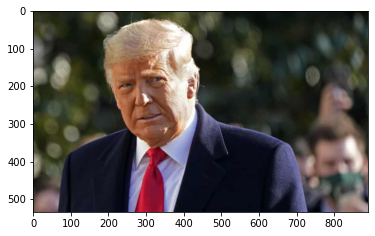

In [ ]:
real_time_prediction('/content/3000.jpg')

predicted age: 50


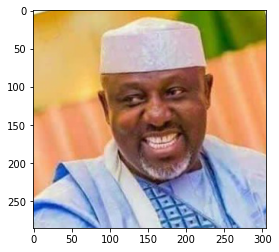

In [ ]:
real_time_prediction('/content/58.jpg')

predicted age: 59


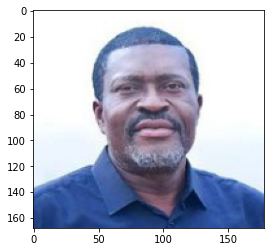

In [ ]:
real_time_prediction('/content/59.jpg')

predicted age: 58


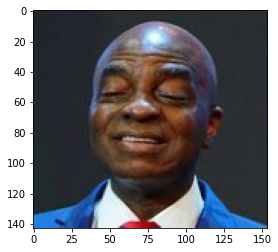

In [ ]:
real_time_prediction('//content/66.jpg')

predicted age: 36


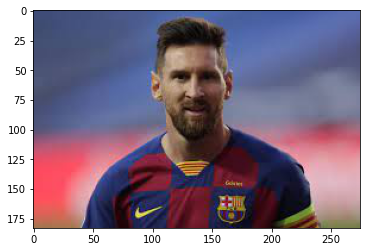

In [ ]:
real_time_prediction('//content/lionel.jpg')

predicted age: 20


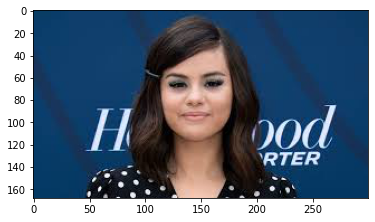

In [ ]:
real_time_prediction('//content/selena.jpg')

predicted age: 15


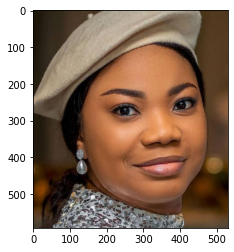

In [ ]:
real_time_prediction('/content/30_1_1_20210518395353156.jpg')

predicted age: 27


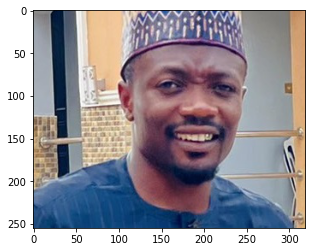

In [ ]:
real_time_prediction('/content/30_0_1_20210516382930233.jpg')

predicted age: 31


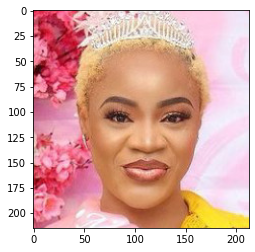

In [ ]:
real_time_prediction('/content/35_1_1_20210601443914868.jpg')

predicted age: 20


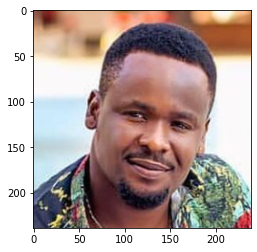

In [ ]:
real_time_prediction('/content/36_0_1_20210526535211262.jpg')

predicted age: 43


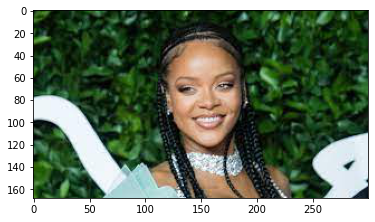

In [ ]:
real_time_prediction('/content/rihana.jpg')

predicted age: 51


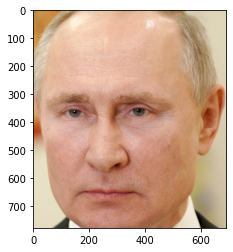

In [ ]:
real_time_prediction('//content/np_file_73471.jpeg')

predicted age: 78


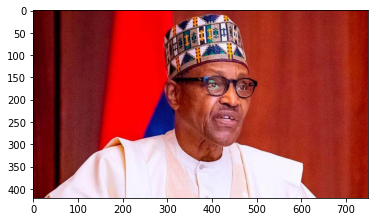

In [ ]:
real_time_prediction('/content/President-Muhammadu-Buhari.jpg')

predicted age: 55


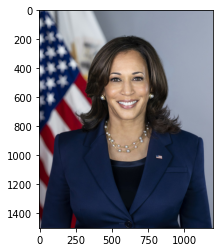

In [ ]:
real_time_prediction('/content/Kamala_Harris_Vice_Presidential_Portrait.jpg')

predicted age: 34


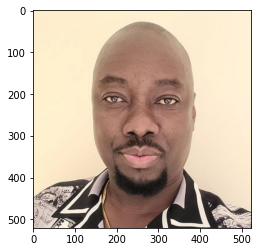

In [ ]:
real_time_prediction('/content/46_0_1_20210428492912545.jpg')

predicted age: 38


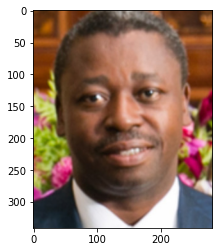

In [ ]:
real_time_prediction('/content/48_0_1_20140606242942352.jpg')

predicted age: 54


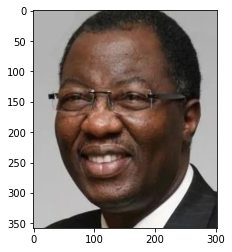

In [ ]:
real_time_prediction('/content/64_0_1_20200604342913855.jpg')

predicted age: 55


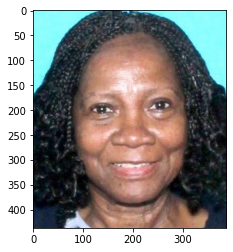

In [ ]:
real_time_prediction('/content/77_1_1_20210525575112614.jpg')

In [ ]:
#To show real-time prediction
def real_time_prediction(fname):
    pred = round(predictor.predict_filename(fname)[0])
    vis.show_image(fname)
    print('predicted age: %s' % pred)

predicted age: 21


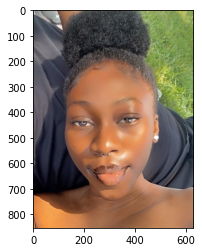

In [ ]:
real_time_prediction('//content/22r.png')

predicted age: 25


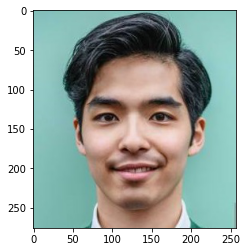

In [ ]:
real_time_prediction('//content/27r.jpg')

predicted age: 60


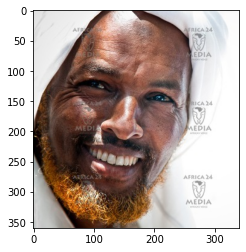

In [ ]:
real_time_prediction('//content/53r.jpg')

predicted age: 34


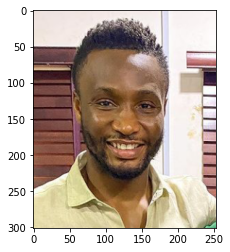

In [ ]:
real_time_prediction('//content/Screenshot_20210619-054950r.png')

predicted age: 57


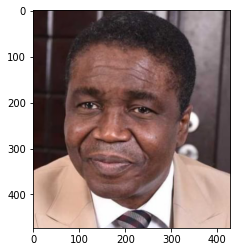

In [ ]:
real_time_prediction('//content/Screenshot_20210621-015018r.png')

predicted age: 52


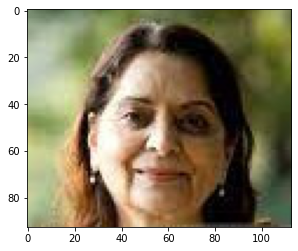

In [ ]:
real_time_prediction('/content/59r.jpg')

predicted age: 73


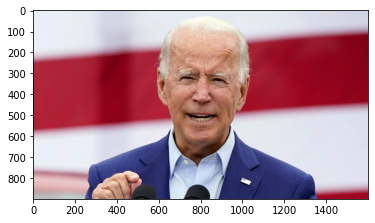

In [ ]:
real_time_prediction('/content/biden-michigan-ap-rc-200909_hpMain_16x9_1600r.jpg')

predicted age: 28


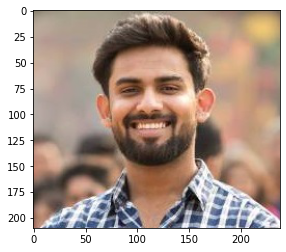

In [ ]:
real_time_prediction('/content/32r.jpg')

In [ ]:
real_time_prediction('/content/32r.jpg')